In [1]:
import numpy as np
from stable_sigmoid import *
from log_loss import *
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm



In [4]:
%matplotlib notebook

In [20]:
real=np.random.uniform(0.0,1.0,1000) # "real" data
fake=np.random.uniform(1.0,2.0,1000) # noisy input for G
#real=np.random.normal(0,1,1000)
#fake=np.random.normal(0,1,1000)
w_D=1
b_D=0
w_G=1
b_G=0 

### Plot error surface

<IPython.core.display.Javascript object>


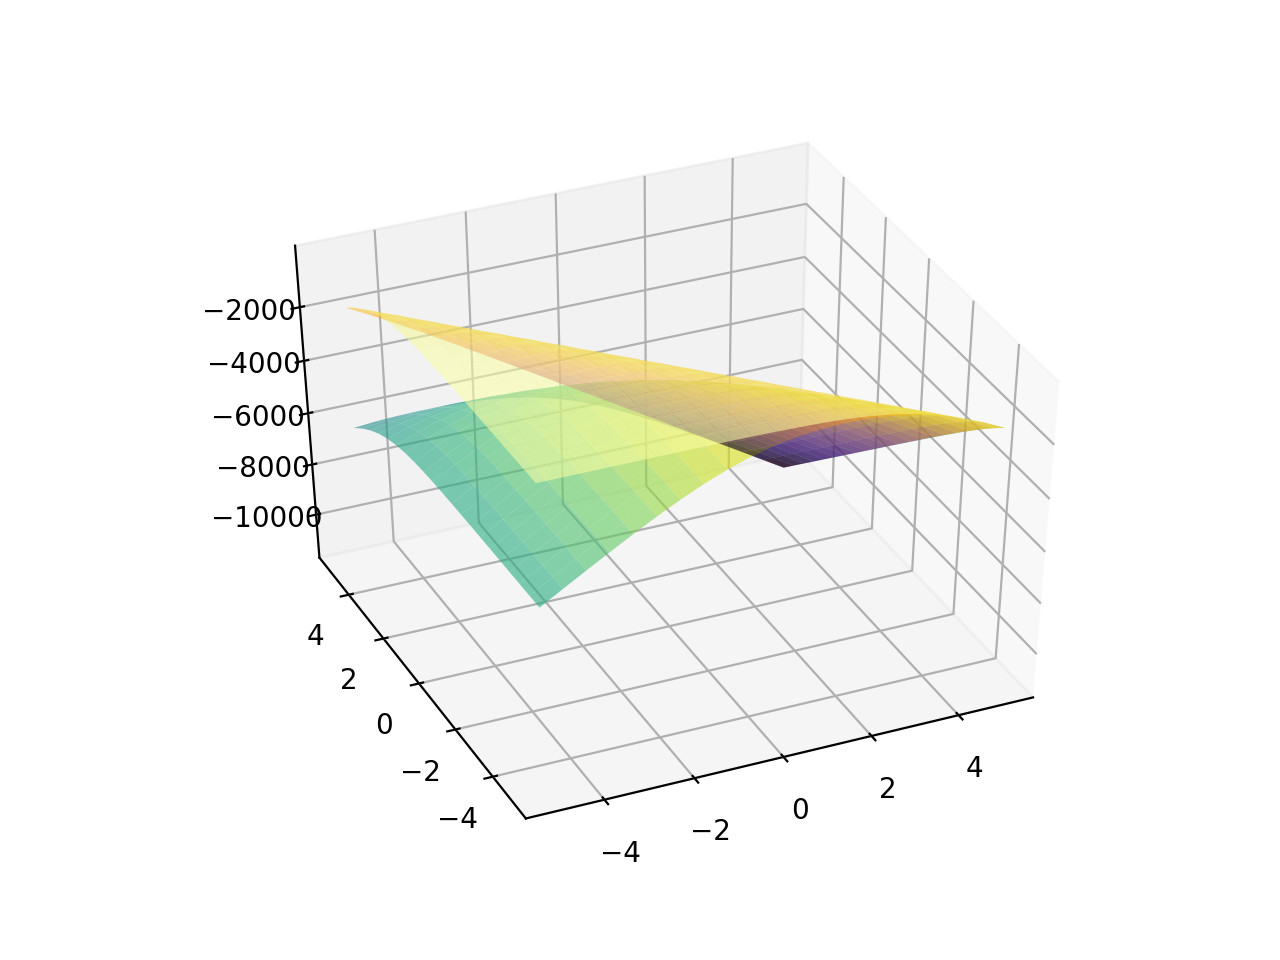

In [22]:
s=0.5
x_ax = np.arange(-5, 5+s, s)   #Discriminator
y_ax = np.arange(-5,5+s, s)   #Generator
x_ax,y_ax = np.meshgrid(x_ax,y_ax)
z_D=np.zeros((x_ax.shape[0],x_ax.shape[1]))
z_G=np.zeros((y_ax.shape[0],y_ax.shape[1]))


for i in range(x_ax.shape[0]):
    for j in range(x_ax.shape[1]):
        forward_D_real=np.dot(real,w_D)+x_ax[i,j]
        forward_G=np.dot(fake,w_G)+y_ax[i,j]
        forward_D_fake=np.dot(forward_G,w_D)+x_ax[i,j]

        z_D[i,j]=np.sum(log_phi(forward_D_real)+log_one_minus_phi(forward_D_fake))
        z_G[i,j]=np.sum(log_one_minus_phi(forward_D_fake))

fig = plt.figure(1)
ax = fig.gca(projection='3d')         # set the 3d axes
ax.plot_surface(x_ax, y_ax, z_D,cmap='viridis', 
                    alpha=0.6)            # transparency of the surface 
ax.plot_surface(x_ax, y_ax, z_G,cmap='inferno', 
                    alpha=0.55)   
    

### plot objective as one

<IPython.core.display.Javascript object>


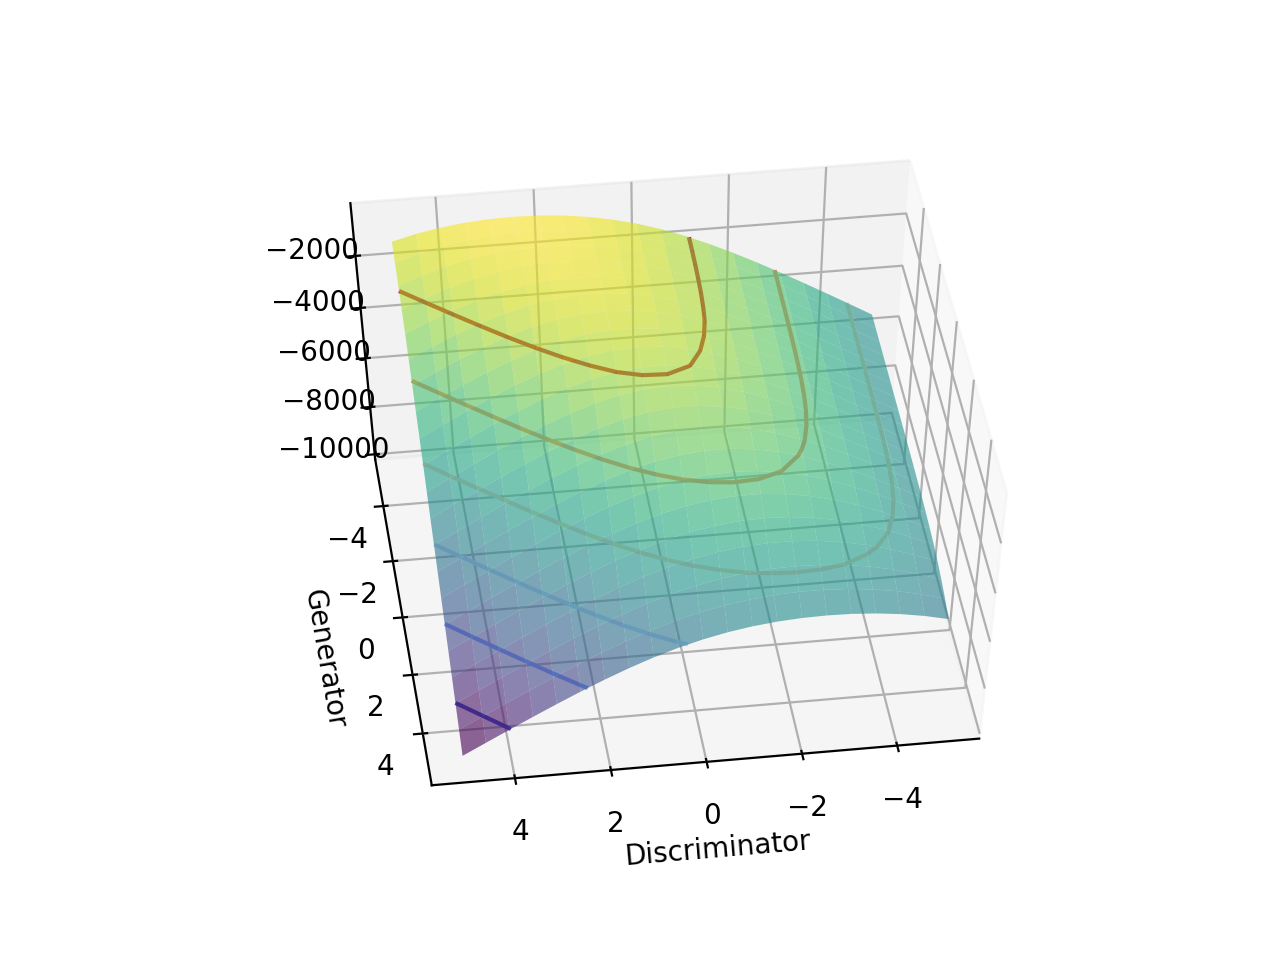

In [11]:
s=0.5
x_ax = np.arange(-5, 5+s, s)   #Discriminator
y_ax = np.arange(-5,5+s, s)   #Generator
x_ax,y_ax = np.meshgrid(x_ax,y_ax)
z=np.zeros((x_ax.shape[0],x_ax.shape[1]))


for i in range(x_ax.shape[0]):
    for j in range(x_ax.shape[1]):
        forward_D_real=np.dot(real,w_D)+x_ax[i,j]
        forward_G=np.dot(fake,w_G)+y_ax[i,j]
        forward_D_fake=np.dot(forward_G,w_D)+x_ax[i,j]

        z[i,j]=np.sum(log_phi(forward_D_real)+log_one_minus_phi(forward_D_fake))#-np.sum(log_one_minus_phi(forward_D_fake))/1000

fig = plt.figure(2)
ax = fig.gca(projection='3d')         # set the 3d axes
ax.plot_surface(x_ax, y_ax, z,cmap='viridis', 
                    alpha=0.6)            # transparency of the surface 
cset = ax.contour(x_ax, y_ax, z, zdir='viridis', cmap=cm.coolwarm)
plt.xlabel('Discriminator')
plt.ylabel('Generator')


### plot gradientflow

<IPython.core.display.Javascript object>


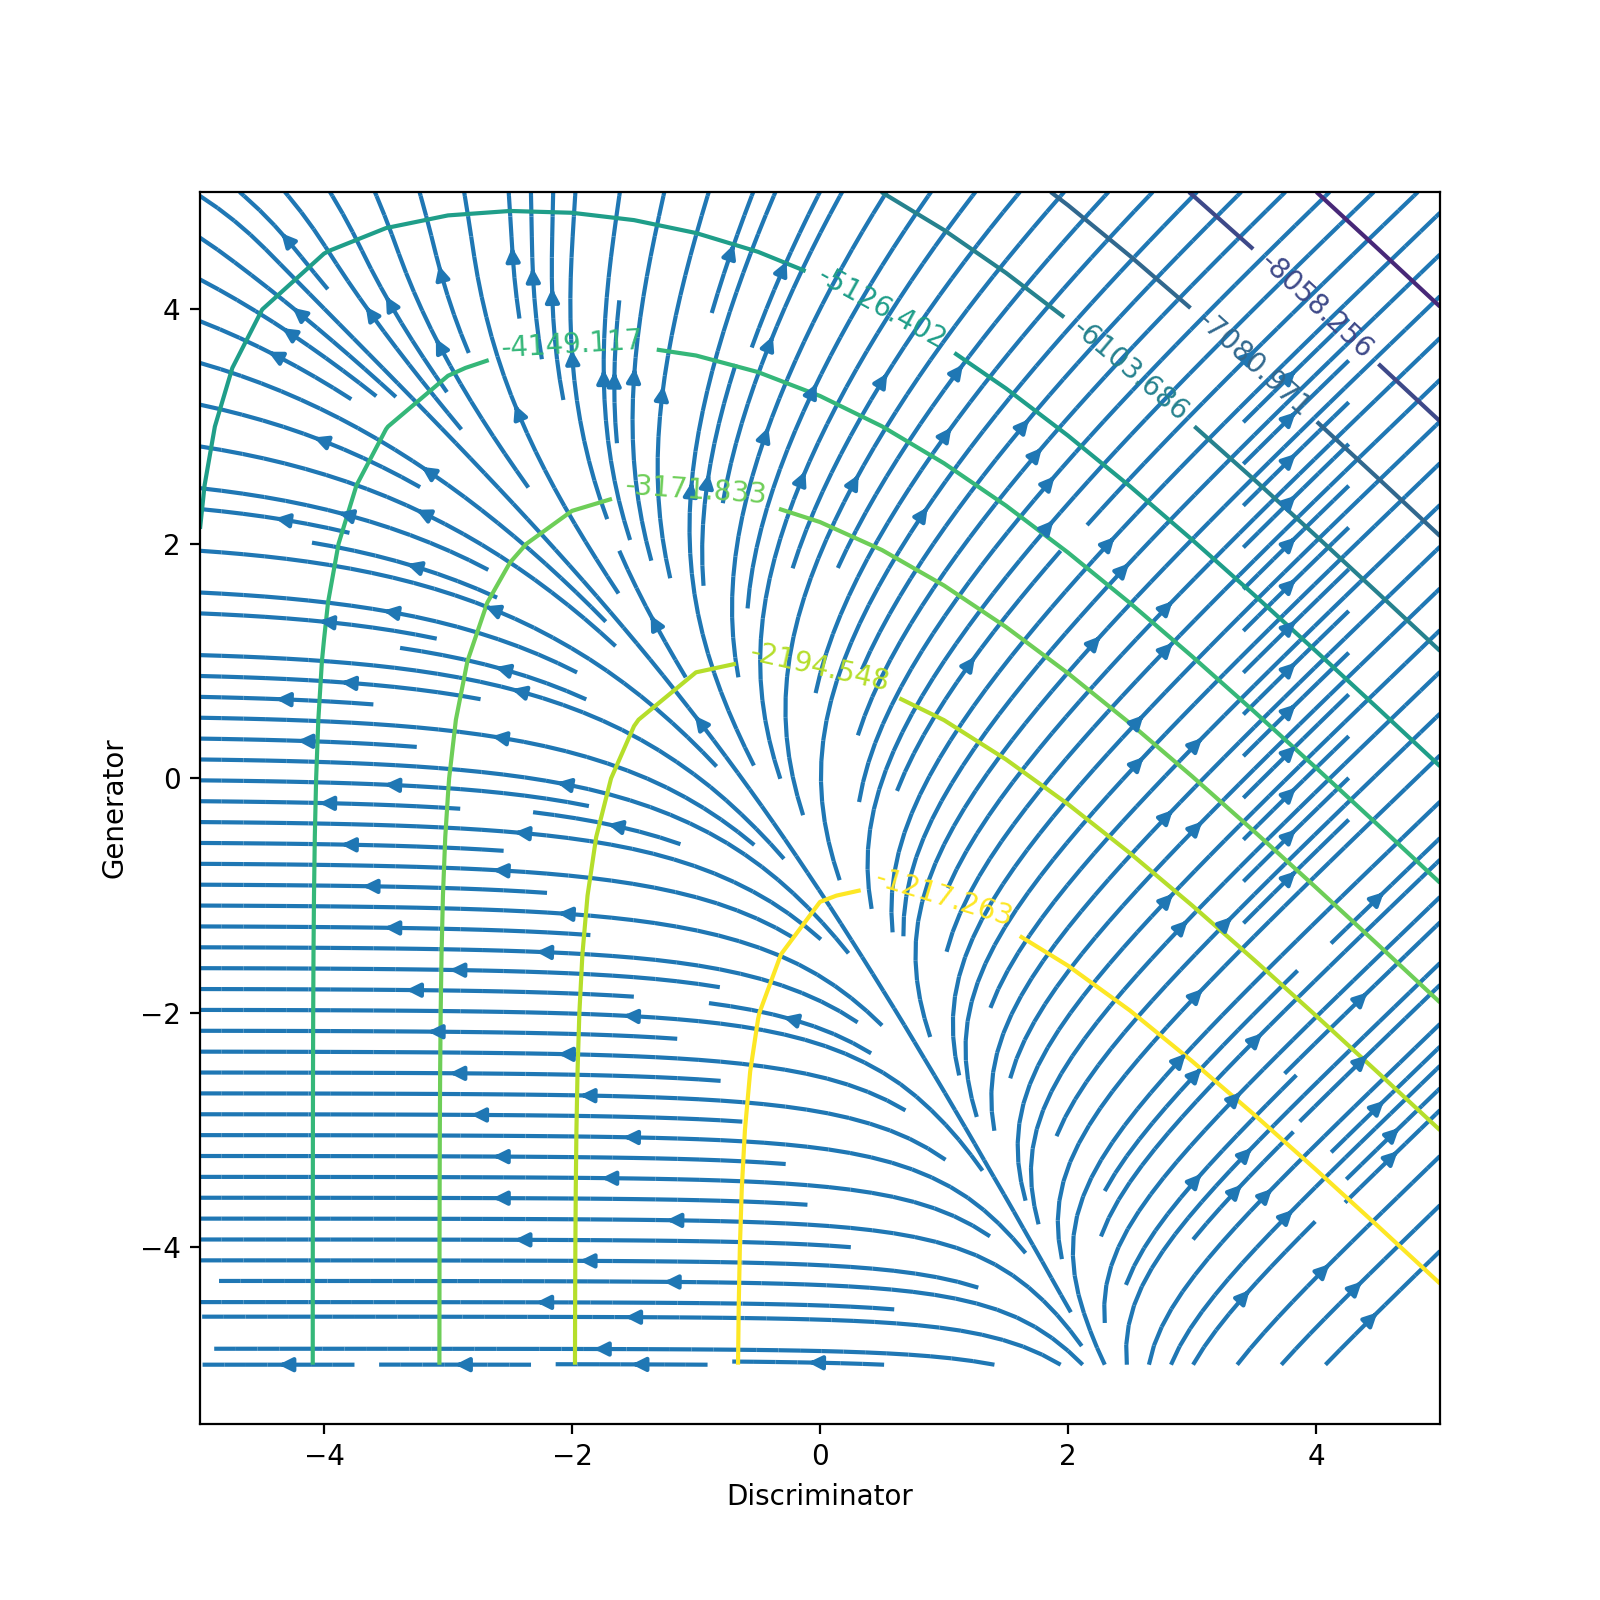

<a list of 8 text.Text objects>

In [19]:
s=0.5
x_ax = np.arange(-5, 5+s, s)   #Discriminator
y_ax = np.arange(-5,5+s, s)   #Generator
x_ax,y_ax = np.meshgrid(x_ax,y_ax)
gradient_D=np.zeros((x_ax.shape[0],x_ax.shape[1]))
gradient_G=np.zeros((y_ax.shape[0],y_ax.shape[1]))


z_G=np.zeros((y_ax.shape[0],y_ax.shape[1]))


for i in range(x_ax.shape[0]):
    for j in range(x_ax.shape[1]):
        forward_D_real=np.dot(real,w_D)+x_ax[i,j]
        forward_G=np.dot(fake,w_G)+y_ax[i,j]
        forward_D_fake=np.dot(forward_G,w_D)+x_ax[i,j]
        
        gradient_D[i,j]=np.sum(1-phi(forward_D_real))-np.sum(phi(forward_D_fake))
        gradient_G[i,j]=-np.sum(phi(forward_D_fake))
        z[i,j]=np.sum(log_phi(forward_D_real)+log_one_minus_phi(forward_D_fake))#-np.sum(log_one_minus_phi(forward_D_fake))/1000

fig = plt.figure(3)
                       
plt.streamplot(x_ax,y_ax,-gradient_D,-gradient_G, density=2)
plt.gcf().set_size_inches((8,8))
plt.show()
plt.xlabel('Discriminator')
plt.ylabel('Generator')

levels = np.arange(z.min(),z.max(),(z.max()-z.min())/10)

CS = plt.contour(x_ax, y_ax, z, levels=levels)
plt.clabel(CS, inline=1, fontsize=10)

        